Name: Abdulkadir Duran Adan

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [5]:
df = pd.read_csv('/Users/boom/Desktop/homework4-LogisticRegression/ex2data1.txt', sep=',')
df.columns = ['exam score 1', 'exam score 2', 'label']
df.describe()

,exam score 1,exam score 2,label
count,99.000000,99.000000,99.000000
mean,65.957614,66.102779,0.606061
std,19.302009,18.638875,0.491108
min,30.058822,30.603263,0.000000
25%,51.297736,47.978125,0.000000
50%,67.319257,66.589353,1.000000
75%,80.234877,79.876423,1.000000
max,99.827858,98.869436,1.000000


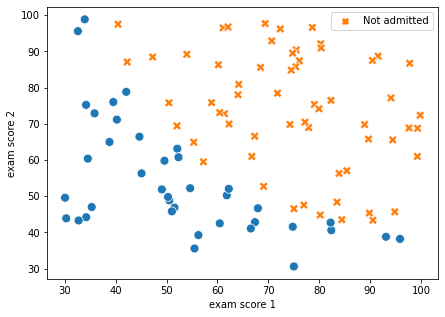

In [52]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam score 1', y='exam score 2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[1:], ['Not admitted'])

plt.show(ax)

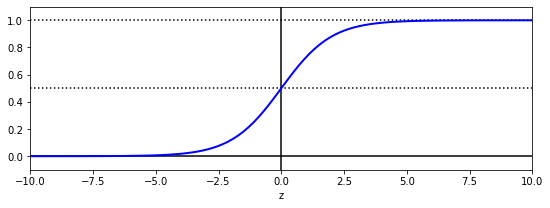

In [12]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [14]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad


In [16]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam score 1', 'exam score 2']].values))
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.10606061]
 [-12.30538878]
 [-11.77067239]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [18]:
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [19]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

In [20]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: [[0.2045574]]
Expected cost (approx): 0.203
theta:
 [[-24.86556581]
 [  0.20334347]
 [  0.19985042]]
Expected theta (approx):
 -25.161
 0.206
 0.201


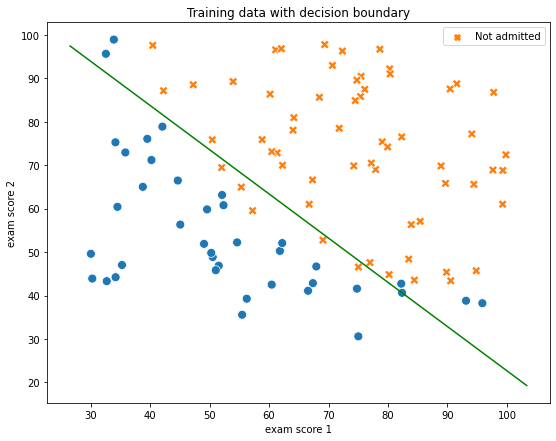

In [23]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x='exam score 1', y='exam score 2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [24]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7811150326208557
Expected value: 0.775 +/- 0.002


In [25]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [28]:
X = np.hstack((np.ones((m,1)),df[['exam score 1', 'exam score 2']].values))

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == df.label.values) * 100}'

'Train accuracy: 88.88888888888889'